## Introdução ao Processamento de Sinais Digitais – MAC0317/ MAC

# Exercício Programa 1–Entrega: 28/03/2018

Neste EP vamos explorar funções de Python, Jupyter notebook e suas bibliotecas, e descobrir técnicas úteis ao
processamento de dados de áudio e de imagens. Você deve entregar um arquivo Jupyter notebook para Python
(.ipynb) que resolva as tarefas abaixo, de forma clara e bem-documentada, deixando todos os cálculos explícitos.

## 1 Áudio

Construa um vetor $f$ que contém a versão amostrada da função $f(t) = sin(2π(440)t)$ no intervalo $0 \leq t < 1$ com
frequência de amostragem de $8192$ amostras por segundo.

In [533]:
import numpy as np
import io
from urllib.request import urlopen
import scipy.io.wavfile as wavfile
import soundfile as sf
from imageio import imread
import matplotlib.pyplot as plt
import IPython.display as ipd

(a) Qual é a frequência da função $f(t)$ em Hertz? E em radianos por segundo?

A forma mais básica da função seno em função de tempo $(t)$ é $y(t) = Asin(2πft + \varphi)$, onde $A$ é a amplitude, $f$ é a frequência em Hertz e $\varphi$ é a fase.

No nosso caso a função $f(t)$ possui frequência $f = 440$ $Hz$, a frequência angular (em radianos/segundo) vale $\omega = 2\pi f = 2\pi * 440 = 880 \pi$ $radianos/segundo$

(b) Plote em um gráfico o vetor $f$ e em outro gráfico plote apenas os primeiros 100 pontos.

Amostrando a função $f(t) = sin(2\pi (440)t)$ no intervalo $0 \leq t < 1$ em 8192 pontos (com intervalo de amostra $\Delta T = 1/8192$), onde cada amostra pode ser calculada como $f_{k} = f(k\Delta T) = sin(2\pi (440)k/8192)$ para $0 \leq k \leq 8191$ e armazenadas em um vetor $f$:

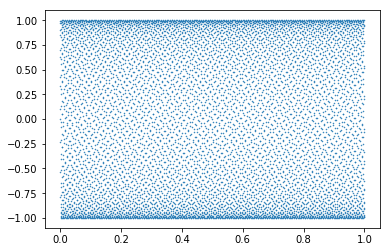

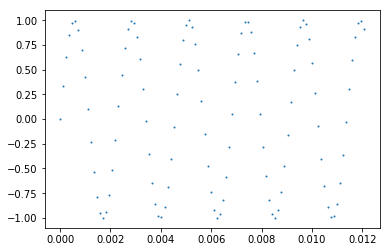

In [534]:
rate = 8192

kdt = np.arange(rate)/rate
f = np.sin(2*np.pi*440*kdt)

# Mostra o gráfico do vetor f
%matplotlib inline
plt.plot(kdt,f,'.',markersize=1)
plt.show()

#Gráfico com os 100 primeiros pontos
N = 100
kdts = kdt[0:N]
fs = f[0:N]
%matplotlib inline
plt.plot(kdts,fs,'.',ms=2)
plt.show()

## 1.1 Aliasing


(a) Qual é a frequência de Nyquist para essa frequência de amostragem? A frequência do vetor $f$ está abaixo ou
acima da frequência de Nyquist?

A frequência de *Nyquist* é dada pela metade da taxa de amostragem, logo a frequência de *Nyquist* é $\dfrac{8192}{2}=4096$.

(b) Insira uma interface que toque o vetor $f$ (como som com a frequência de amostragem de $8192$ $Hz$).

In [535]:
# toca vetor f
ipd.Audio(f, rate=rate)

(c) Construa um vetor $g$ a partir do sinal $g(t) = sin(2π(440 + 8192)t)$, com a mesma frequência de amostragem.
Compare os vetores. Eles soam iguais? Explique.

In [536]:
g = np.sin(2*np.pi*(440 + 8192)*kdt)

# toca vetor g
ipd.Audio(g, rate=rate)

Os áudios soam iguais pois ocorreu o efeito de aliasing, neste caso considerando $t = k/8192$ (representando cada amostra no nosso vetor) o sinal $g(t)$ assume forma

$$sin(2π(440 + 8192)k/8192) = sin(2\pi (440)k/8192 + 2\pi k) = sin(2\pi (440)k/8192)$$ 

uma vez que $sin(x + 2\pi k) = sin(x)$ para qualquer $x$, onde $k$ é inteiro. 

Esse efeito ocorre quando a frequência do sinal $\nu$ não está no intervalo $-f_{N} < \nu \leq f_{N}$ onde $f_{N}$ é a frequência de *Nyquist*. No nosso caso, a frequência do sinal que vale $8632$, é maior que a frequência de *Nyquist* que vale $4096$, logo os dois sinais são *aliases* entre si para esta frequência de amostragem e temos a mesma percepção sonora para os dois sinais.

(d) Reamostre $f(t)$ com uma frequência de $512$ $amostras/segundo$. Descreva o efeito sonoro do vetor resultante.

In [537]:
rate_2 = 512

kdt_2 = np.arange(rate_2)/rate_2
f_2 = np.sin(2*np.pi*440*kdt_2)

# toca vetor f_2
ipd.Audio(f_2, rate=rate_2)

Um som bem mais grave que o do sinal $f$, quase inaudível, além dos cliques do início e final da execução. Com esta frequência de amostragem, este sinal sofre o efeito de *aliasing* também, já que a frequência do sinal (440) para a ser maior que a frequência de *Nyquist* que agora vale $256$, tendo como *alias* algum sinal com frequência entre $-255$ e $256$. 

## 1.2 Quantização


(a) Construa um vetor $qf$ como versão quantizada defusando $4$ níveis de quantização (veja o exemplo 1.26 do
livro). Como soa esse sinal?

Usando a estrutura mostrada no exemplo 1.26, temos como valor mínimo $m=-1$ e valor máximo $M=1$ e $r=4$ para obter uma versão de 2-bits do sinal (4 níveis de quantização).

$$q(f(t)) = ceil(r\dfrac{f(t) - m}{M - m}) - 1 = ceil(4\dfrac{f(t) + 1}{2}) - 1 = ceil(2(f(t) + 1)) - 1$$

E em seguida reconstruímos uma aproximação do sinal $f$ como $\tilde{f}$ que mapeia os valores $0, 1, 2$ e $3$ de $q(f(t))$ para $-0.75, -0.25, 0.25$ e $0.75$ em $\tilde{f}$.

In [538]:
qf = np.ceil(2*(f + 1)) - 1

# reconstruindo o sinal remapeando os valores 0,1,2 e 3 de qf para -0.75, -0.25, 0.25 e 0.75 em ftilde

ftilde = -1 + 0.5*(qf+ 0.5)

# toca vetor f (para facil comparação com o próximo sinal)
ipd.Audio(f, rate=rate)

In [539]:
# toca vetor ftilde
ipd.Audio(ftilde, rate=rate)

O sinal quantizado soa bem parecido com vetor f comparando em relação à frequência, porém, é nítido que o som possui um "ruído" devido à distância ou "pulos" entre duas amostras seguidas deixando o áudio com aspecto sujo. 

(b) Calcule a porcentagem de distorção do sinal quantizado em relação ao sinal original (veja equação 1.39 do livro,
e a função numpy.linalg.norm).

Como a equação 1.39 nos mostra, o cálculo da medida de distorção $mD$ é dada por:

$$mD = \dfrac{\Vert \tilde{f} - f \Vert^{2}}{\Vert f \Vert^2}$$

In [540]:
from numpy import linalg as LA

mD = LA.norm(ftilde - f)**2/LA.norm(f)**2

print("Medida de distorção:", mD*100, "%")

Medida de distorção: 5.238994855177736 %


(c) Construa vetores com números maiores de níveis de quantização e calcule as respectivas porcentagens de
distorção. A partir de quantos níveis o sinal quantizado soa igual ao original? Qual a distorção correspondente?

In [541]:
qfn = np.zeros((6, 8192))
ftilden = np.zeros((6, 8192))
mDn = np.zeros(6)

for i in range(3, 9):
    qfn[i - 3] = np.ceil((2**(i - 1))*(f + 1)) - 1
    ftilden[i - 3] = -1 + (qfn[i - 3] + 0.5)/(2**(i - 1))
    mDn[i - 3] = LA.norm(ftilden[i - 3] - f)**2/LA.norm(f)**2
    print("Sinal quantizado com ", i, "-bits:")
    print("Medida de distorção: ", mDn[i - 3]*100, "%")
    ipd.display(ipd.Audio(ftilden[i - 3], rate=rate))

Sinal quantizado com  3 -bits:
Medida de distorção:  1.2321216384066154 %


Sinal quantizado com  4 -bits:
Medida de distorção:  0.2941434334201302 %


Sinal quantizado com  5 -bits:
Medida de distorção:  0.07103300566457822 %


Sinal quantizado com  6 -bits:
Medida de distorção:  0.017285012143282152 %


Sinal quantizado com  7 -bits:
Medida de distorção:  0.004234059380970327 %


Sinal quantizado com  8 -bits:
Medida de distorção:  0.0010529509046114998 %


O vetor do sinal quantizado passa a soar como o original com a quantização utilizando 6-bits (quantização possuindo 64 níveis). Com uma medida de distorção de aproximadamente 0.017%.

## 2 Imagem

Considere uma imagem colorida de sua escolha, disponível online (use sua url no código).


(a) Carregue a imagem e plote-a.


(b) Transforme a imagem colorida em uma imagem com tons de cinza e plote-a. Use a média dos valores RGB
como intensidade de cinza (não use funções prontas para realizar essa conversão).

## 2.1 Aliasing

Considere a função $f(x,y) = 128(1 + sin(2π(20)x) sin(2π(30)y))$, sendo $0 \leq x,y \leq 1$, interpretada como imagem com um canal de cor (tons de cinza).
Reamostre a imagem com frequências diferentes para os eixos x e y. Plote varias versões da imagem para ilustrar
o efeito de aliasing nas duas componentes.

## 2.2 Quantização

Considere a imagem ’double-ferris.jpg’ usada na aula (disponível em
https://sutherncharm.files.wordpress.com/2009/09/double-ferris.jpg)


(a) Quantize a imagem com 6 e com 4 bits de precisão e plote as duas versões.


(b) Qual é a distorção em ambos os casos? Na expressão da distorção use a norma de Frobenius (veja exemplo
1.14 do livro).